### Configuração inicial:


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)
SEED_VALUE = 202407
np.random.seed(SEED_VALUE)

admission = pd.read_csv("data/9 - Admissao - Dados.csv")
X = admission.drop(columns=['ChanceOfAdmit'])
y = admission['ChanceOfAdmit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)
def space():
    print("\n\n")

def calculate_syx(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def print_metrics(y_true, y_pred):
    print("R2:", r2_score(y_true, y_pred))
    print("Syx:", calculate_syx(y_true, y_pred))
    print("PEARSON:", pearsonr(y_true, y_pred)[0])
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))

### KNN:

In [3]:
knn_tune_grid = {'n_neighbors':  np.arange(1, 20, 2)}
knn_model = GridSearchCV(KNeighborsRegressor(), knn_tune_grid, cv=10)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print_metrics(y_test, knn_pred)



R2: 0.7023572712785962
Syx: 0.0740027026533491
PEARSON: 0.8466327190259721
RMSE: 0.0740027026533491
MAE: 0.05544


### RNA:

In [15]:
# HOLD OUT
rna_model = MLPRegressor(max_iter=500, random_state=SEED_VALUE)
rna_model.fit(X_train, y_train)
rna_pred = rna_model.predict(X_test)
print("HOLD OUT: \n")
print_metrics(y_test, rna_pred)


space()

# CV
rna_tune_grid = {'hidden_layer_sizes': [(size,) for size in np.arange(1,46,10)], 'alpha':  np.arange(0.1, 0.9, 0.1)}
rna_cv_model = GridSearchCV(MLPRegressor(max_iter=500, random_state=SEED_VALUE), rna_tune_grid, cv=10)
rna_cv_model.fit(X_train, y_train)
rna_cv_pred = rna_cv_model.predict(X_test)
print("CV: \n")
print_metrics(y_test, rna_cv_pred)

/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


HOLD OUT: 

R2: -0.6561142220308107
Syx: 0.17456014160901157
PEARSON: 0.6434073402863987
RMSE: 0.17456014160901157
MAE: 0.14034463446902767





/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached 

CV: 

R2: -13.039633997219955
Syx: 0.5082505242761775
PEARSON: -0.20740717268209982
RMSE: 0.5082505242761775
MAE: 0.42249710915258115


/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### SVM:

In [4]:
# HOLD OUT
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("HOLD OUT: \n")
print_metrics(y_test, svm_pred)

space()

# CV
svm_tune_grid = {'C': range(1,100,23), 'gamma': range(1,10,2)}
svm_cv_model = GridSearchCV(SVR(), svm_tune_grid, cv=10)
svm_cv_model.fit(X_train, y_train)
svm_cv_pred = svm_cv_model.predict(X_test)
print("CV: \n")
print_metrics(y_test, svm_cv_pred)

HOLD OUT: 

R2: 0.6802130759562066
Syx: 0.07670616901099628
PEARSON: 0.8856104347127588
RMSE: 0.07670616901099628
MAE: 0.063127095708825



CV: 

R2: -0.0004313383297072093
Syx: 0.13567304926716095
PEARSON: 0.2795215326966054
RMSE: 0.13567304926716095
MAE: 0.1097104654353311


### RF:

In [5]:
# HOLD OUT
rf_model = RandomForestRegressor(random_state=SEED_VALUE)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("HOLD OUT: \n")
print_metrics(y_test, rf_pred)


space()

#CV
rf_tune_grid = {'n_estimators': [200], 'max_features': range(2,11,3)}
rf_cv_model = GridSearchCV(RandomForestRegressor(random_state=SEED_VALUE), rf_tune_grid, cv=10)
rf_cv_model.fit(X_train, y_train)
rf_cv_pred = rf_cv_model.predict(X_test)
print("CV: \n")
print_metrics(y_test, rf_cv_pred)

HOLD OUT: 

R2: 0.8400374363288918
Syx: 0.054251171415924296
PEARSON: 0.9211832353376009
RMSE: 0.054251171415924296
MAE: 0.041090000000000064



CV: 

R2: 0.83770818522939
Syx: 0.05464472572902163
PEARSON: 0.9231051610332387
RMSE: 0.05464472572902163
MAE: 0.042551999999999986


### TESTE DE NOVOS CASOS COM O MELHOR MODELO:  RF - HOLD OUT

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        299           96                  2  1.5   2.0  7.86         0   
1        319          110                  3  3.0   2.5  8.79         0   
2        297           99                  4  3.0   3.5  7.81         0   

   ChanceOfAdmit  
0         0.4707  
1         0.4656  
2         0.4667  


/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ChanceOfAdmit
Feature names seen at fit time, yet now missing:
- num

  warnings.warn(message, FutureWarning)


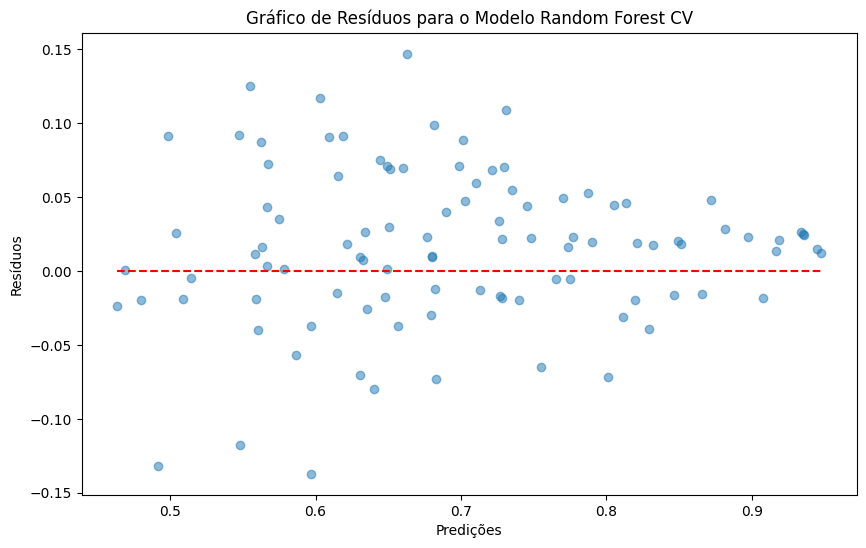

In [17]:
admission_new_cases = pd.read_csv("data/9 - Admissao - Novos_Dados.csv")
result_prediction = rf_model.predict(admission_new_cases)
admission_new_cases['ChanceOfAdmit'] = result_prediction
print(admission_new_cases)

rf_cv_predictions = rf_cv_model.predict(X_test)
residuals = y_test - rf_cv_predictions

plt.figure(figsize=(10, 6))
plt.scatter(rf_cv_predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(rf_cv_predictions), xmax=max(rf_cv_predictions), colors='r', linestyles='dashed')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos para o Modelo Random Forest CV')
plt.savefig('residuos_rf_cv.png')
plt.show()